In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [31]:
df = pd.read_csv("mus.csv")

In [32]:
numerical_features = [
    'len', 'dating', 'violence', 'world/life', 'night/time',
    'shake the audience', 'family/gospel', 'romantic',
    'communication', 'obscene', 'music', 'movement/places',
    'light/visual perceptions', 'family/spiritual', 'like/girls',
    'sadness', 'feelings', 'danceability', 'loudness',
    'acousticness', 'instrumentalness', 'valence', 'energy', 'age'
]

In [33]:
target = 'genre'

In [34]:
df = df[numerical_features + [target]].dropna()

In [35]:
X = df[numerical_features].values
le = LabelEncoder()
y = le.fit_transform(df[target])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [38]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)

C:\Users\Win10_Game_OS\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [05:26:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [40]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

       blues       0.41      0.35      0.38       921
     country       0.48      0.59      0.53      1089
     hip hop       0.74      0.53      0.62       181
        jazz       0.54      0.41      0.47       769
         pop       0.44      0.52      0.48      1408
      reggae       0.51      0.49      0.50       500
        rock       0.45      0.38      0.41       807

    accuracy                           0.47      5675
   macro avg       0.51      0.47      0.48      5675
weighted avg       0.47      0.47      0.47      5675



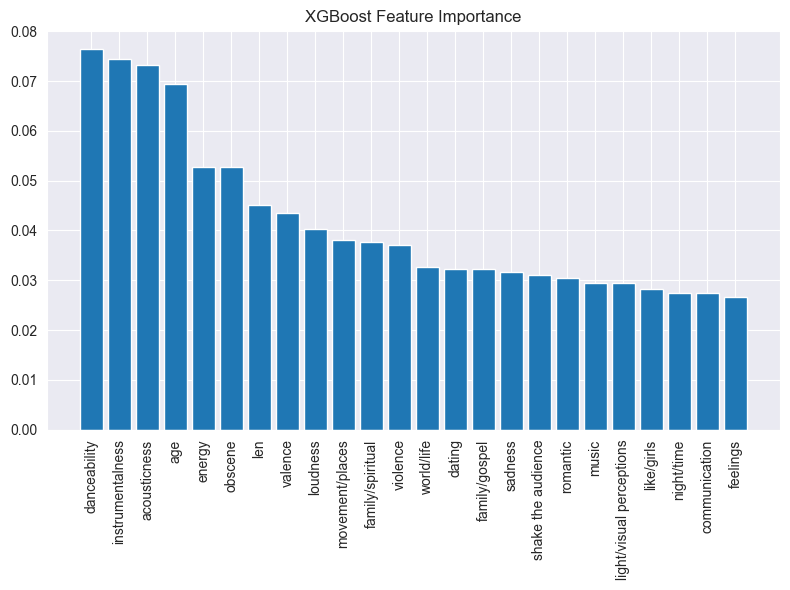

In [41]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = [numerical_features[i] for i in indices]

plt.figure(figsize=(8, 6))
plt.bar(features, importances[indices])
plt.xticks(rotation=90)
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()